# IMPORT DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df = pd.read_csv("/content/drive/MyDrive/superstore_final_dataset.csv", encoding="cp1250")

# OVERVIEW

In [2]:
# Check the number of rows and columns
df.shape

(9800, 18)

In [3]:
# Check initial columns types
df.dtypes

,0
Row_ID,int64
Order_ID,object
Order_Date,object
Ship_Date,object
Ship_Mode,object
Customer_ID,object
Customer_Name,object
Segment,object
Country,object
City,object


In [4]:
# Change the type of columns
df["Order_Date"] = pd.to_datetime(df["Order_Date"], dayfirst=True, errors="coerce")
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"], dayfirst=True, errors="coerce")
df['Postal_Code'] = df['Postal_Code'].astype('Int64').astype(str)


In [5]:
# Tworzenie tabeli ze strukturą danych
structure_table = pd.DataFrame({
    "Typ danych": df.dtypes.astype(str),
    "Liczba braków": df.isnull().sum().values,
    "Przykładowa wartość": [df[col].dropna().iloc[0] for col in df.columns]
})

# Wyświetlenie tabeli
print(structure_table)



                   Typ danych  Liczba braków  \
Row_ID                  int64              0   
Order_ID               object              0   
Order_Date     datetime64[ns]              0   
Ship_Date      datetime64[ns]              0   
Ship_Mode              object              0   
Customer_ID            object              0   
Customer_Name          object              0   
Segment                object              0   
Country                object              0   
City                   object              0   
State                  object              0   
Postal_Code            object              0   
Region                 object              0   
Product_ID             object              0   
Category               object              0   
Sub_Category           object              0   
Product_Name           object              0   
Sales                 float64              0   

                             Przykładowa wartość  
Row_ID                              

In [6]:
# Count unique values
df.nunique()

,0
Row_ID,9800
Order_ID,4922
Order_Date,1230
Ship_Date,1326
Ship_Mode,4
Customer_ID,793
Customer_Name,793
Segment,3
Country,1
City,529


In [7]:
# List and count unique values
print("Region:", df["Region"].unique())
print("Unique values:", df["Region"].nunique())

print("\nSegment:", df["Segment"].unique())
print("Unique values:", df["Segment"].nunique())

print("\nCategory:", df["Category"].unique())
print("Unique values:", df["Category"].nunique())

print("\nSub_Category:", df["Sub_Category"].unique())
print("Unique values:", df["Sub_Category"].nunique())

Region: ['South' 'West' 'Central' 'East']
Unique values: 4

Segment: ['Consumer' 'Corporate' 'Home Office']
Unique values: 3

Category: ['Furniture' 'Office Supplies' 'Technology']
Unique values: 3

Sub_Category: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Unique values: 17


In [8]:
# Show max and min
print("Order_Date")
print("Min:", df["Order_Date"].min())
print("Max:", df["Order_Date"].max())

print("\nSales")
print("Min:", df["Sales"].min())
print("Max:", df["Sales"].max())

Order_Date
Min: 2015-01-03 00:00:00
Max: 2018-12-30 00:00:00

Sales
Min: 0.444
Max: 22638.48


# DATA EXPLORATION

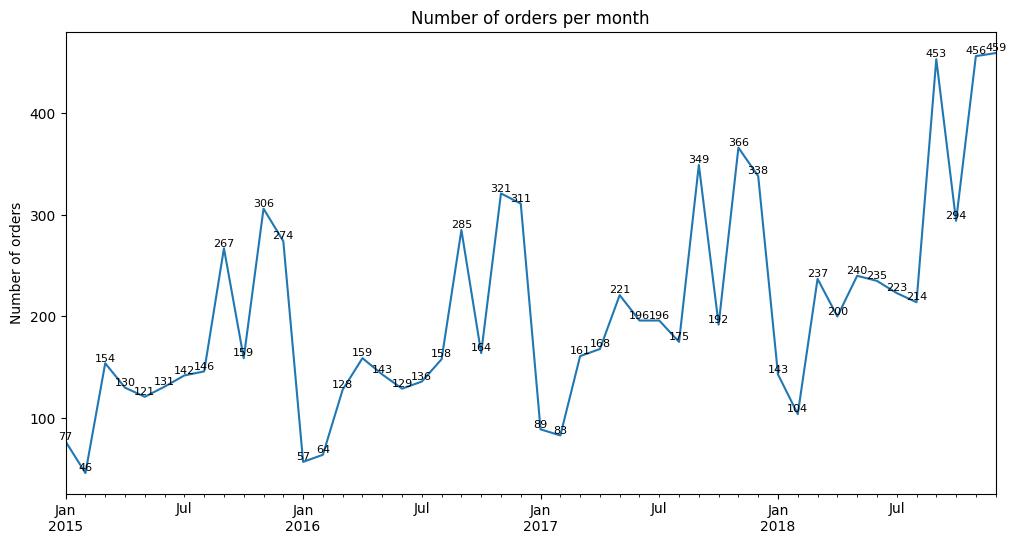

In [9]:
# Number of orders per month

orders_per_month = df.groupby(df["Order_Date"].dt.to_period("M"))["Order_ID"].count()
ax =  orders_per_month.plot(kind="line", figsize=(12,6))
plt.title("Number of orders per month")
plt.ylabel("Number of orders")
plt.xlabel("")
for x, y in zip(orders_per_month.index.astype(str), orders_per_month.values):
    ax.text(x, y, str(y), ha="center", va="bottom", fontsize=8)
plt.show()

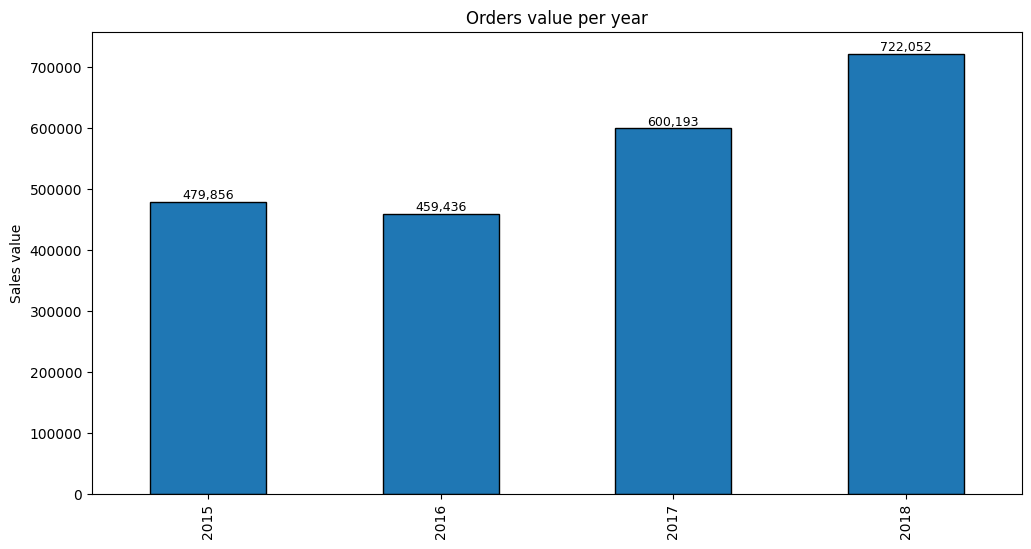

In [10]:
# Orders value per year

sales_per_year = df.groupby(df["Order_Date"].dt.year)["Sales"].sum()
ax = sales_per_year.plot(kind="bar", figsize=(12,6), edgecolor="black")
plt.title("Orders value per year")
plt.ylabel("Sales value")
plt.xlabel("")

for i, v in enumerate(sales_per_year.values):
    ax.text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.show()


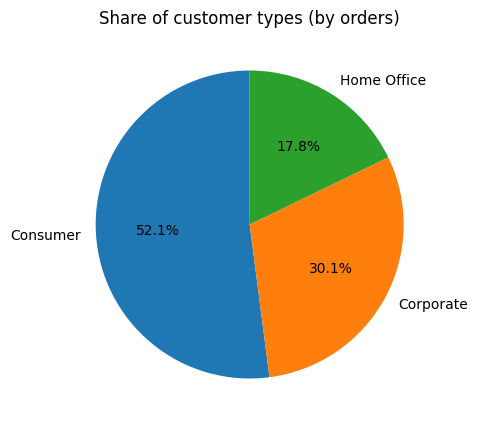

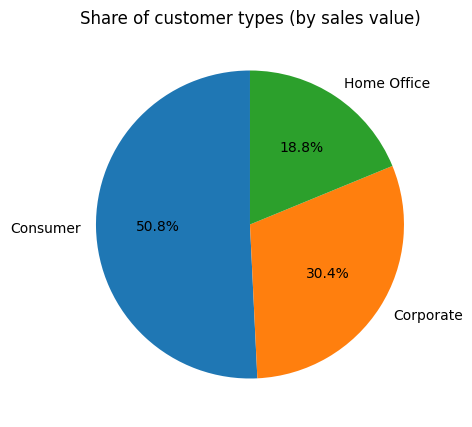

In [11]:
# Share of customer types (orders)
share = df["Segment"].value_counts(normalize=True) * 100
share.plot(kind="pie", autopct="%.1f%%", figsize=(5,5), startangle=90)
plt.title("Share of customer types (by orders)")
plt.ylabel("")
plt.show()

# Share of customer types (sales value)
share_value = df.groupby("Segment")["Sales"].sum()
share_value = share_value / share_value.sum() * 100
share_value.plot(kind="pie", autopct="%.1f%%", figsize=(5,5), startangle=90)
plt.title("Share of customer types (by sales value)")
plt.ylabel("")
plt.show()

In [12]:
# Sales value per state (top 10)

sales_per_state = df.groupby("State")["Sales"].sum().reset_index()
top10 = sales_per_state.sort_values("Sales", ascending=False).head(10)

state_coords = {
    "Alabama": (32.8, -86.6),
    "Alaska": (61.4, -152.3),
    "Arizona": (34.2, -111.6),
    "Arkansas": (34.9, -92.4),
    "California": (37.3, -119.7),
    "Colorado": (39.0, -105.5),
    "Connecticut": (41.6, -72.7),
    "Delaware": (39.0, -75.5),
    "Florida": (27.8, -81.5),
    "Georgia": (32.6, -83.4),
    "Hawaii": (20.8, -156.3),
    "Idaho": (44.1, -114.6),
    "Illinois": (40.0, -89.2),
    "Indiana": (40.0, -86.3),
    "Iowa": (42.0, -93.5),
    "Kansas": (38.5, -98.0),
    "Kentucky": (37.8, -85.8),
    "Louisiana": (30.9, -91.9),
    "Maine": (45.3, -69.2),
    "Maryland": (39.0, -76.7),
    "Massachusetts": (42.4, -71.5),
    "Michigan": (44.2, -85.6),
    "Minnesota": (46.7, -94.6),
    "Mississippi": (32.7, -89.7),
    "Missouri": (38.5, -92.5),
    "Montana": (46.9, -110.4),
    "Nebraska": (41.5, -99.8),
    "Nevada": (39.5, -116.9),
    "New Hampshire": (43.9, -71.6),
    "New Jersey": (40.1, -74.7),
    "New Mexico": (34.4, -106.1),
    "New York": (43.0, -75.0),
    "North Carolina": (35.5, -79.4),
    "North Dakota": (47.5, -100.5),
    "Ohio": (40.3, -82.8),
    "Oklahoma": (35.6, -97.5),
    "Oregon": (43.9, -120.6),
    "Pennsylvania": (41.0, -77.6),
    "Rhode Island": (41.7, -71.6),
    "South Carolina": (33.9, -80.9),
    "South Dakota": (44.4, -100.2),
    "Tennessee": (35.9, -86.3),
    "Texas": (31.0, -99.9),
    "Utah": (39.3, -111.7),
    "Vermont": (44.0, -72.7),
    "Virginia": (37.5, -78.8),
    "Washington": (47.4, -120.5),
    "West Virginia": (38.6, -80.6),
    "Wisconsin": (44.5, -89.5),
    "Wyoming": (43.0, -107.6),
    "District of Columbia": (38.9, -77.0)
}

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}


top10["StateCode"] = top10["State"].map(us_state_to_abbrev)
top10["Lat"] = top10["State"].map(lambda x: state_coords[x][0])
top10["Lon"] = top10["State"].map(lambda x: state_coords[x][1])

choropleth = go.Choropleth(
    locations=sales_per_state["State"].map(us_state_to_abbrev),
    z=sales_per_state["Sales"],
    locationmode="USA-states",
    colorscale="Blues",
    marker_line_color="black",
    colorbar_title="Sales ($)"
)

scatter = go.Scattergeo(
    locationmode="USA-states",
    lon=top10["Lon"],
    lat=top10["Lat"],
    text=[f"{code}<br>${val:,.0f}" for code, val in zip(top10["StateCode"], top10["Sales"])],
    mode="text",
    showlegend=False
)

fig = go.Figure(data=[choropleth, scatter])
fig.update_layout(
    title_text="Sales value per state (TOP 10)",
    geo=dict(scope="usa"),
    width=1200,
    height=800
)

fig.show()


# SEGMENTATION

In [13]:
# Removing extra columns and aggregating sales value
df_small = df[["Order_Date", "Order_ID", "Customer_ID", "Sales"]]
df_grouped = df_small.groupby(["Order_Date", "Order_ID", "Customer_ID"], as_index=False)["Sales"].sum()

print(df_grouped.head())


  Order_Date        Order_ID Customer_ID    Sales
0 2015-01-03  CA-2015-103800    DP-13000   16.448
1 2015-01-04  CA-2015-112326    PO-19195  288.060
2 2015-01-05  CA-2015-141817    MB-18085   19.536
3 2015-01-06  CA-2015-106054    JO-15145   12.780
4 2015-01-06  CA-2015-130813    LS-17230   19.440


In [14]:
# 1. Obliczenie RFM
rfm = df_grouped.groupby("Customer_ID").agg({
    "Order_Date": lambda x: (df_grouped["Order_Date"].max() - x.max()).days,  # Recency
    "Order_ID": "nunique",   # Frequency = liczba unikalnych zamówień
    "Sales": "sum"           # Monetary = łączna sprzedaż
}).reset_index()

rfm.rename(columns={
    "Order_Date": "Recency",
    "Order_ID": "Frequency",
    "Sales": "Monetary"
}, inplace=True)

# zaokrąglenie wartości Monetary do pełnych
rfm["Monetary"] = rfm["Monetary"].round(0)

rfm.head()

,Customer_ID,Recency,Frequency,Monetary
0,AA-10315,184,5,5564.0
1,AA-10375,19,9,1056.0
2,AA-10480,259,4,1791.0
3,AA-10645,55,6,5087.0
4,AB-10015,415,3,886.0


In [15]:
# 2. Wyznaczenie progów (median)
R_median = rfm["Recency"].median()
F_median = rfm["Frequency"].median()
M_median = rfm["Monetary"].median()

print(R_median)
print(F_median)
print(M_median)

75.0
6.0
2215.0


In [16]:
# 3. Przydzielanie etykiet High/Low
rfm["Recency"] = rfm["Recency"].apply(lambda x: "High" if x > R_median else "Low")
rfm["Frequency"] = rfm["Frequency"].apply(lambda x: "High" if x > F_median else "Low")
rfm["Monetary"] = rfm["Monetary"].apply(lambda x: "High" if x > M_median else "Low")

rfm

,Customer_ID,Recency,Frequency,Monetary
0,AA-10315,High,Low,High
1,AA-10375,Low,High,Low
2,AA-10480,High,Low,Low
3,AA-10645,Low,Low,High
4,AB-10015,High,Low,Low
...,...,...,...,...
788,XP-21865,Low,High,High
789,YC-21895,Low,Low,High
790,YS-21880,Low,High,High
791,ZC-21910,Low,High,High


In [17]:



# 4. Przypisywanie segmentów
def assign_segment(row):
    if row["Recency"] == "Low" and row["Frequency"] == "Low" and row["Monetary"] == "Low":
        return "Nowy klient"
    elif row["Recency"] == "High" and row["Frequency"] == "High" and row["Monetary"] == "Low":
        return "Regularny klient niskoobrotowy"
    elif row["Recency"] == "High" and row["Frequency"] == "High" and row["Monetary"] == "High":
        return "Regularny klient wysokoobrotowy"
    elif row["Recency"] == "High" and row["Frequency"] == "Low" and row["Monetary"] == "High":
        return "Idealny klient"
    elif row["Recency"] == "High" and row["Frequency"] == "Low" and row["Monetary"] == "Low":
        return "Utracony klient"
    else:
        return "Inny"

rfm["Segment_name"] = rfm.apply(assign_segment, axis=1)
print(rfm[["Customer_ID", "Recency", "Frequency", "Monetary", "Segment_name"]].head())



  Customer_ID Recency Frequency Monetary     Segment_name
0    AA-10315    High       Low     High   Idealny klient
1    AA-10375     Low      High      Low             Inny
2    AA-10480    High       Low      Low  Utracony klient
3    AA-10645     Low       Low     High             Inny
4    AB-10015    High       Low      Low  Utracony klient


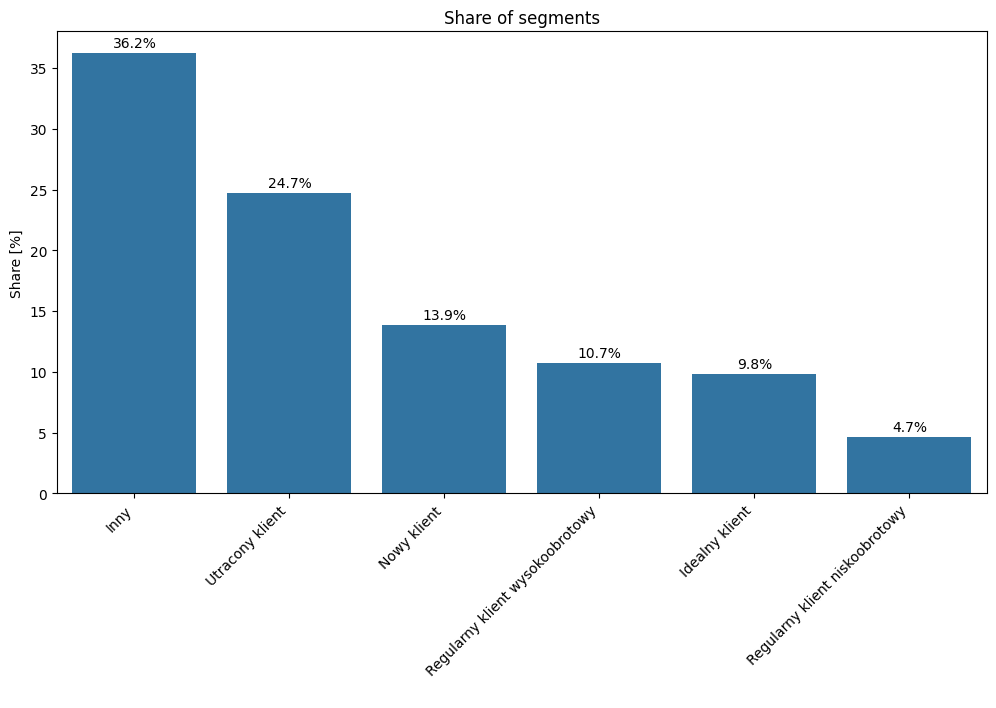

In [22]:
# 5. Udział segmentów (%)
segment_counts = rfm["Segment_name"].value_counts(normalize=True) * 100

# wykres słupkowy
plt.figure(figsize=(12,6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)

plt.title("Share of segments")
plt.ylabel("Share [%]")
plt.xlabel(" ")

for i, v in enumerate(segment_counts.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=10)

plt.xticks(rotation=45, ha="right")
plt.show()

In [19]:
# Filtrujemy klientów z segmentu "Inny"
other_customers = rfm[rfm["Segment_name"] == "Inny"]

# Grupujemy po kombinacjach R, F, M i liczymy ich wystąpienia
other_combinations = other_customers.groupby(["Recency", "Frequency", "Monetary"]).size().reset_index(name="Count")

# Posortowanie według liczby wystąpień, aby zobaczyć najczęściej występujące kombinacje
other_combinations_sorted = other_combinations.sort_values("Count", ascending=False)

# Podgląd najczęściej występujących kombinacji
print(other_combinations_sorted)


  Recency Frequency Monetary  Count
0     Low      High     High    161
2     Low       Low     High     72
1     Low      High      Low     54


In [23]:
# NOWE
# 4. Przypisywanie segmentów
def assign_segment_new(row):
    if row["Recency"] == "Low" and row["Frequency"] == "Low" and row["Monetary"] == "Low":
        return "Nowy klient"
    elif row["Frequency"] == "High" and row["Monetary"] == "Low":
        return "Regularny klient niskoobrotowy"
    elif row["Frequency"] == "High" and row["Monetary"] == "High":
        return "Regularny klient wysokoobrotowy"
    elif row["Recency"] == "High" and row["Frequency"] == "Low" and row["Monetary"] == "High":
        return "Idealny klient"
    elif row["Recency"] == "High" and row["Frequency"] == "Low" and row["Monetary"] == "Low":
        return "Utracony klient"
    else:
        return "Inny"

rfm["Segment_name"] = rfm.apply(assign_segment_new, axis=1)
print(rfm[["Customer_ID", "Recency", "Frequency", "Monetary", "Segment_name"]].head())

  Customer_ID Recency Frequency Monetary                    Segment_name
0    AA-10315    High       Low     High                  Idealny klient
1    AA-10375     Low      High      Low  Regularny klient niskoobrotowy
2    AA-10480    High       Low      Low                 Utracony klient
3    AA-10645     Low       Low     High                            Inny
4    AB-10015    High       Low      Low                 Utracony klient


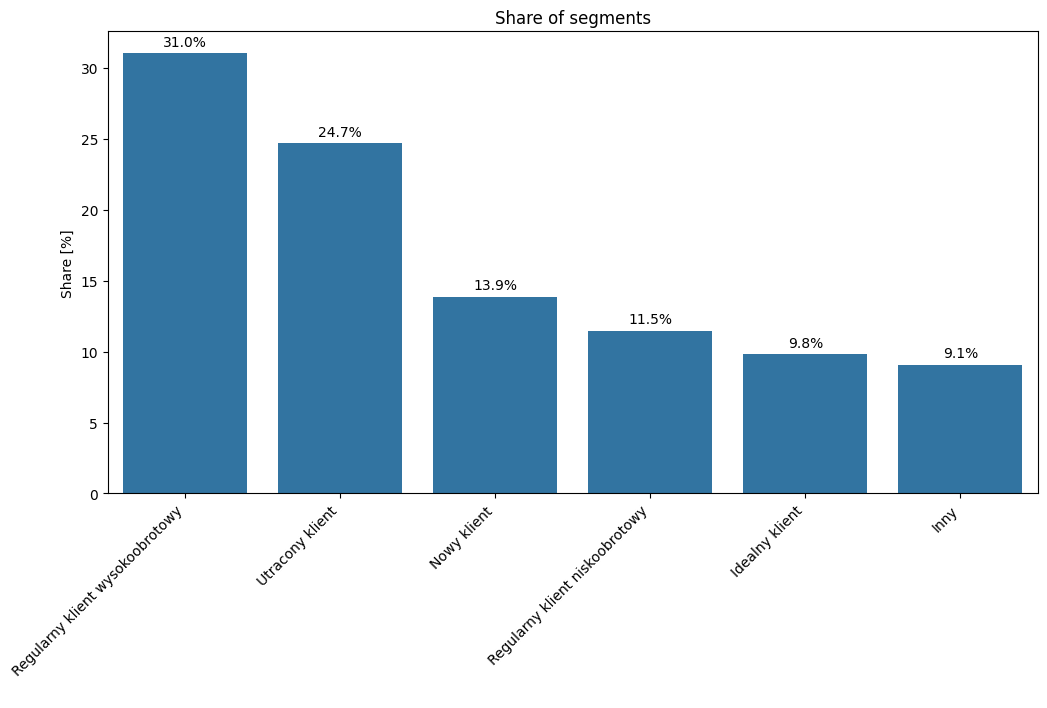

In [24]:
#NOWE
# 5. Udział segmentów (%)
segment_counts = rfm["Segment_name"].value_counts(normalize=True) * 100

# wykres słupkowy
plt.figure(figsize=(12,6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)

plt.title("Share of segments")
plt.ylabel("Share [%]")
plt.xlabel(" ")

for i, v in enumerate(segment_counts.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=10)

plt.xticks(rotation=45, ha="right")
plt.show()